##  Feature Scaling:- used to make column's data in SAME RANGE.

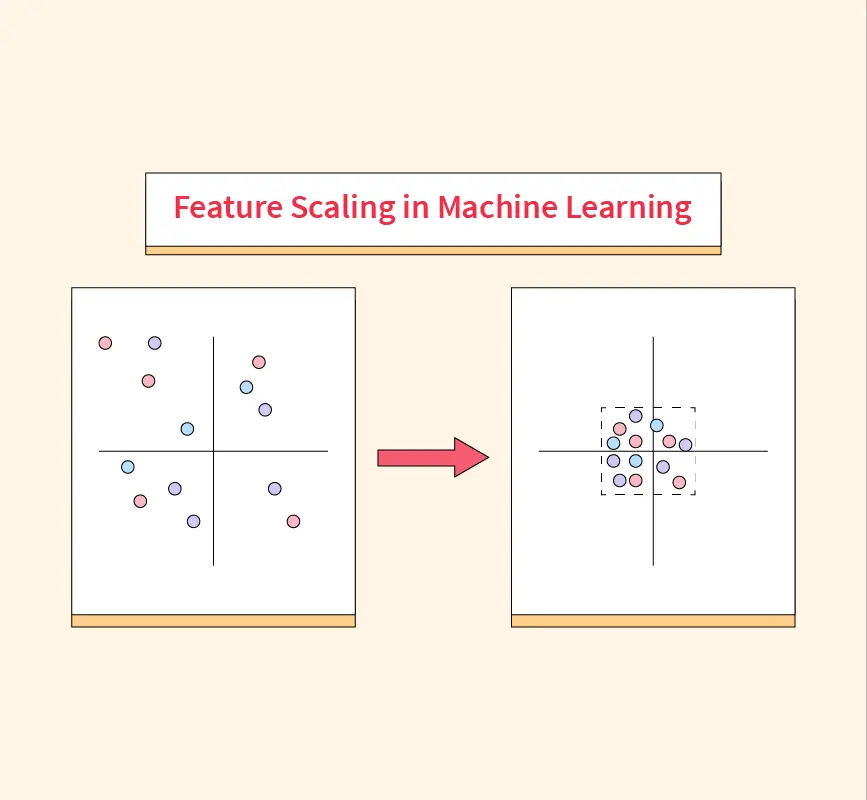

## Types of Feature Scaling:

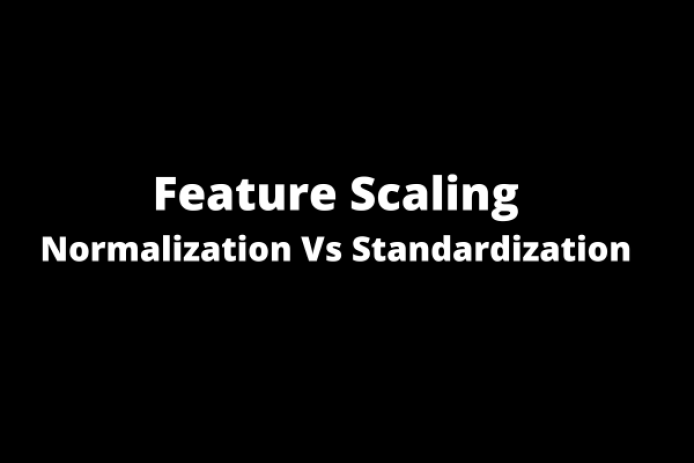

## NORMALIZATION FORMULA:
#### Scaling each observation from original range into the range 0 and 1

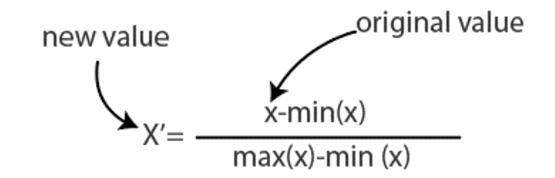

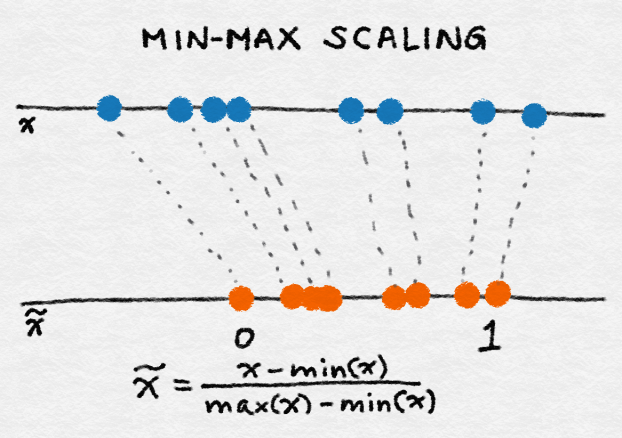

## STANDARIZATION FORMULA:
#### rescaling data so it has ZERO mean and unit variance

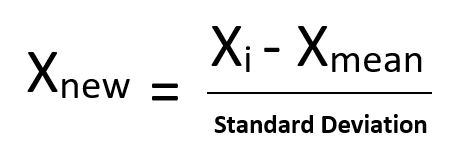

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [4]:
df=pd.read_csv('Data.csv')
df

,Country,Age,Salary,Purchased
0,France,44.0,72000.0,No
1,Spain,27.0,48000.0,Yes
2,Germany,30.0,54000.0,No
3,Spain,38.0,61000.0,No
4,Germany,40.0,NaN,Yes
5,France,35.0,58000.0,Yes
6,Spain,NaN,52000.0,No
7,France,48.0,79000.0,Yes
8,Germany,50.0,83000.0,No
9,France,37.0,67000.0,Yes


In [5]:
from sklearn.impute import SimpleImputer
imp= SimpleImputer(missing_values=np.nan,strategy='mean')

In [6]:
x=df.iloc[:,:-1].values
y=df.iloc[:,-1].values

In [7]:
x

array([['France', 44.0, 72000.0],
       ['Spain', 27.0, 48000.0],
       ['Germany', 30.0, 54000.0],
       ['Spain', 38.0, 61000.0],
       ['Germany', 40.0, nan],
       ['France', 35.0, 58000.0],
       ['Spain', nan, 52000.0],
       ['France', 48.0, 79000.0],
       ['Germany', 50.0, 83000.0],
       ['France', 37.0, 67000.0]], dtype=object)

In [8]:
y

array(['No', 'Yes', 'No', 'No', 'Yes', 'Yes', 'No', 'Yes', 'No', 'Yes'],
      dtype=object)

In [9]:
df.isnull().sum()

Country      0
Age          1
Salary       1
Purchased    0
dtype: int64

In [12]:
x[:,1:3]=imp.fit_transform(x[:,1:3])

In [15]:
x1=pd.DataFrame(x,columns=df.columns[:-1])

In [16]:
x1

,Country,Age,Salary
0,France,44.0,72000.0
1,Spain,27.0,48000.0
2,Germany,30.0,54000.0
3,Spain,38.0,61000.0
4,Germany,40.0,63777.777778
5,France,35.0,58000.0
6,Spain,38.777778,52000.0
7,France,48.0,79000.0
8,Germany,50.0,83000.0
9,France,37.0,67000.0


~ look age going from 27 to 50

~ salary going from 48000 to 83000


so both features donot have on a same scale,this will cause some issue for machine learning model.

In [19]:
## ENCODING CATAGORICAL DATA

from sklearn.preprocessing import LabelEncoder,OneHotEncoder
from sklearn.compose import ColumnTransformer

#COUNTRY COLUMN
ct=ColumnTransformer([('Country',OneHotEncoder(),[0])],remainder='passthrough')
x= ct.fit_transform(x)

In [20]:
x=x.astype(int)

In [21]:
x

array([[    1,     0,     0,    44, 72000],
       [    0,     0,     1,    27, 48000],
       [    0,     1,     0,    30, 54000],
       [    0,     0,     1,    38, 61000],
       [    0,     1,     0,    40, 63777],
       [    1,     0,     0,    35, 58000],
       [    0,     0,     1,    38, 52000],
       [    1,     0,     0,    48, 79000],
       [    0,     1,     0,    50, 83000],
       [    1,     0,     0,    37, 67000]])

In [23]:
label_y=LabelEncoder()
y=label_y.fit_transform(y)
y

array([0, 1, 0, 0, 1, 1, 0, 1, 0, 1])

## Feature Scaling using STANDARDIZATION: 

In [24]:
from sklearn.preprocessing import StandardScaler
sc=StandardScaler()

In [25]:
x1=x[:,3:5]
x1

array([[   44, 72000],
       [   27, 48000],
       [   30, 54000],
       [   38, 61000],
       [   40, 63777],
       [   35, 58000],
       [   38, 52000],
       [   48, 79000],
       [   50, 83000],
       [   37, 67000]])

In [26]:
x_new=sc.fit_transform(x1)

In [27]:
x_new

array([[ 7.69734393e-01,  7.49480344e-01],
       [-1.69922498e+00, -1.43817132e+00],
       [-1.26352627e+00, -8.91258402e-01],
       [-1.01663033e-01, -2.53193334e-01],
       [ 1.88802776e-01, -6.38065068e-05],
       [-5.37361746e-01, -5.26649792e-01],
       [-1.01663033e-01, -1.07356271e+00],
       [ 1.35066601e+00,  1.38754541e+00],
       [ 1.64113182e+00,  1.75215402e+00],
       [-2.46895937e-01,  2.93719581e-01]])

## Feature Scaling using NORMALIZATION: 

In [29]:
from sklearn.preprocessing import MinMaxScaler
sc=MinMaxScaler(feature_range=(0,1))

In [31]:
x1=x[:,3:5]
x1

array([[   44, 72000],
       [   27, 48000],
       [   30, 54000],
       [   38, 61000],
       [   40, 63777],
       [   35, 58000],
       [   38, 52000],
       [   48, 79000],
       [   50, 83000],
       [   37, 67000]])